In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import cmcrameri

In [15]:
crosswalk = pd.read_excel("../../data/MESSAGE/mapping_file_R10edit.xlsx",sheet_name="main")
crosswalk["AR6_R10_simple"] = "Others"
crosswalk.loc[crosswalk[crosswalk["AR6_R10"]=='R10CHINA+'].index,"AR6_R10_simple"] = "CHINA+"
crosswalk.loc[crosswalk[crosswalk["AR6_R10"]=='R10INDIA+'].index,"AR6_R10_simple"] = "INDIA+"
crosswalk.loc[crosswalk[crosswalk["AR6_R10"]=='R10EUROPE'].index,"AR6_R10_simple"] = "EUROPE"
crosswalk.loc[crosswalk[crosswalk["AR6_R10"]=='R10NORTH_AM'].index,"AR6_R10_simple"] = "NORTH_AM"
#crosswalk.loc[crosswalk[crosswalk["AR6_R10"]=='R10MIDDLE_EAST'].index,"AR6_R10_simple"] = "MIDDLE_EAST"
crosswalk

,Countries,R10,AR6_R10,GEM_Name,ISO,AR6_R10_simple
0,Algeria,Africa (R10),R10AFRICA,Algeria,DZA,Others
1,Angola,Africa (R10),R10AFRICA,Angola,AGO,Others
2,Benin,Africa (R10),R10AFRICA,NaN,BEN,Others
3,Botswana,Africa (R10),R10AFRICA,NaN,BWA,Others
4,Burkina Faso,Africa (R10),R10AFRICA,NaN,BFA,Others
...,...,...,...,...,...,...
189,Singapore,Rest of Asia (R10),R10REST_ASIA,Singapore,SGP,Others
190,Indonesia,Rest of Asia (R10),R10REST_ASIA,Indonesia,IDN,Others
191,Thailand,Rest of Asia (R10),R10REST_ASIA,Thailand,THA,Others
192,Brunei Darussalam,Rest of Asia (R10),R10REST_ASIA,Brunei,BRN,Others


In [3]:
crosswalk["AR6_R10"].unique()

array(['R10AFRICA', 'R10CHINA+', 'R10EUROPE', 'R10INDIA+', 'R10LATIN_AM',
       'R10MIDDLE_EAST', 'R10NORTH_AM', 'R10PAC_OECD', 'R10REF_ECON',
       'R10REST_ASIA'], dtype=object)

In [4]:
gas_hist = pd.read_csv("gas_historical.csv")
coal_hist = pd.read_csv("coal_historical.csv")

### new build coal

In [5]:
coal_nb = pd.read_csv("../_data_process/_all_temporal_coal_indicators.csv")
coal_nb = coal_nb.sort_values(by="Year")
for cntry in coal_nb["Country"].unique():
    coal_nb_cntry = coal_nb[coal_nb["Country"]==cntry]
    coal_nb.loc[coal_nb_cntry.index[0],"Coal_newRet_MW"] = 0
    coal_nb.loc[coal_nb_cntry.index[0],"Coal_newCurrent_MW"] = coal_nb_cntry.loc[coal_nb_cntry.index[0],"Coal_Current_MW"]
    new_ind = coal_nb_cntry.index
    for i in 1+np.arange(len(new_ind)-1):
        coal_nb.loc[new_ind[i],"Coal_newRet_MW"] =  coal_nb.loc[new_ind[i-1],"Coal_Ret_MW"] + coal_nb.loc[new_ind[i-1],"Coal_Tran_MW"] - coal_nb.loc[new_ind[i],"Coal_Ret_MW"] - coal_nb.loc[new_ind[i],"Coal_Tran_MW"]
        coal_nb.loc[new_ind[i],"Coal_newCurrent_MW"] = coal_nb.loc[new_ind[i],"Coal_Current_MW"]  - coal_nb.loc[new_ind[i-1],"Coal_Current_MW"] - coal_nb.loc[new_ind[i],"Coal_newRet_MW"]
coal_nb.to_csv("EXAMINE THIS.csv")

In [16]:
coal_nb_R10 = pd.merge(coal_nb,crosswalk[["AR6_R10_simple","GEM_Name"]],left_on = "Country",right_on="GEM_Name").drop(columns=["Country","GEM_Name"])
coal_nb_R10 = coal_nb_R10.rename(columns={"Year":"year"})
coal_nb_R10 = coal_nb_R10.groupby(["AR6_R10_simple","year"]).sum()
coal_nb_R10 = coal_nb_R10.reset_index()
##### REMOVE NEGATVE VALUES FOR NOW ###
problem_ind = coal_nb_R10[coal_nb_R10["Coal_newCurrent_MW"]<0].index
coal_nb_R10.loc[problem_ind,"Coal_newCurrent_MW"] = 0
coal_nb_R10

,AR6_R10_simple,year,Coal_Current_MW,Coal_AnnualMtCO2,Coal_start_year,Coal_Peak_MW,Coal_Ret_MW,Coal_EarlyRet_MW,Coal_Tran_MW,Coal_duration_year,Coal_Share_Ret,Coal_Share_EarlyRet,Coal_Share_Tran,Coal_Share_PhasedOut,Coal_logCurrent_MW,Coal_newRet_MW,Coal_newCurrent_MW
0,CHINA+,1953,50.00,0.3,1953.0,50.00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,3.912023,0.0,50.0
1,CHINA+,1954,236.00,1.4,1953.0,236.00,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,5.463832,0.0,186.0
2,CHINA+,1955,236.00,1.4,1953.0,236.00,0.0,0.0,0.0,2.0,0.000000,0.000000,0.000000,0.000000,5.463832,0.0,0.0
3,CHINA+,1956,286.00,1.7,1953.0,286.00,0.0,0.0,0.0,3.0,0.000000,0.000000,0.000000,0.000000,5.655992,0.0,50.0
4,CHINA+,1957,286.00,1.7,1953.0,286.00,0.0,0.0,0.0,4.0,0.000000,0.000000,0.000000,0.000000,5.655992,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,Others,2018,330498.78,1685.6,81174.0,340336.78,7554.9,394.4,6307.0,1564.0,48.190457,1.050251,88.496935,95.802242,305.976298,-1436.0,5832.0
417,Others,2019,344302.38,1741.8,83193.0,354228.38,9398.9,548.4,6307.0,1605.0,64.155117,4.012225,88.457796,85.599220,313.399575,-1844.0,15647.6
418,Others,2020,350958.38,1768.0,85213.0,362545.38,10177.9,798.4,7307.0,1647.0,67.890377,4.511713,91.024379,94.038255,321.843651,-1779.0,8435.0
419,Others,2021,357539.18,1790.5,85213.0,369313.18,13334.9,918.4,9987.0,1690.0,103.058662,32.650222,97.433312,121.784404,324.072535,-5837.0,12417.8


In [17]:
coal_pivot = coal_nb_R10.pivot(index='year', columns='AR6_R10_simple', values='Coal_newCurrent_MW')
coal_pivot = coal_pivot.fillna(0)
coal_pivot = coal_pivot.iloc[:-1]
coal_pivot.index = coal_pivot.index.astype(int)
coal_pivot = coal_pivot/1000
coal_pivot

AR6_R10_simple,CHINA+,EUROPE,INDIA+,NORTH_AM,Others
year,,,,,
1927,0.000,0.0360,0.000,0.0000,0.0000
1928,0.000,0.0000,0.000,0.0000,0.0000
1929,0.000,0.0000,0.000,0.0000,0.0000
1930,0.000,0.0000,0.000,0.0000,0.0000
1931,0.000,0.0000,0.000,0.0000,0.0000
...,...,...,...,...,...
2017,44.309,2.9980,10.271,0.0000,14.1236
2018,39.369,2.9880,8.251,1.0533,5.8320
2019,48.984,1.1690,9.815,0.0000,15.6476


### new build gas

In [8]:
gas_nb = pd.read_csv("../_data_process/_all_temporal_gas_indicators.csv")
gas_nb = gas_nb.sort_values(by="year")
for cntry in gas_nb["Country Code"].unique():
    gas_nb_cntry = gas_nb[gas_nb["Country Code"]==cntry]
    gas_nb.loc[gas_nb_cntry.index[0],"Gas_newRet_MW"] = 0
    gas_nb.loc[gas_nb_cntry.index[0],"Gas_newCurrent_MW"] = gas_nb.loc[gas_nb_cntry.index[0],"Gas_Current_MW"]
    new_ind = gas_nb_cntry.index
    for i in 1+np.arange(len(new_ind)-1):
        gas_nb.loc[new_ind[i],"Gas_newRet_MW"] =  gas_nb.loc[new_ind[i-1],"Gas_Ret_MW"] - gas_nb.loc[new_ind[i],"Gas_Ret_MW"]
        gas_nb.loc[new_ind[i],"Gas_newCurrent_MW"] = gas_nb.loc[new_ind[i],"Gas_Current_MW"]  - gas_nb.loc[new_ind[i-1],"Gas_Current_MW"] - gas_nb.loc[new_ind[i],"Gas_newRet_MW"]
gas_nb

,year,Gas_Current_MW,Gas_start_year,Gas_duration_year,Gas_Peak_MW,Gas_Ret_MW,Gas_EarlyRet_MW,Gas_Share_Ret,Gas_Share_EarlyRet,Gas_Share_PhasedOut,Gas_logCurrent_MW,Country Code,Gas_newRet_MW,Gas_newCurrent_MW
0,1924,50,1924,0,50,0.0,0.0,0.000000,0.000000,0.0,3.912023,GBR,0.0,50.0
100,1925,80,1925,0,80,0.0,0.0,0.000000,0.000000,0.0,4.382027,RUS,0.0,80.0
1,1925,50,1924,1,50,0.0,0.0,0.000000,0.000000,0.0,3.912023,GBR,0.0,0.0
2,1926,50,1924,2,50,0.0,0.0,0.000000,0.000000,0.0,3.912023,GBR,0.0,0.0
101,1926,80,1925,1,80,0.0,0.0,0.000000,0.000000,0.0,4.382027,RUS,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332,2023,4252,1981,42,4252,82.0,82.0,1.928504,1.928504,0.0,8.355145,PRT,0.0,0.0
1294,2023,15285,1967,56,15285,480.0,0.0,3.140334,0.000000,0.0,9.634627,AUS,0.0,0.0
736,2023,12230,1958,65,12230,0.0,0.0,0.000000,0.000000,0.0,9.411647,ISR,0.0,0.0
1351,2023,4015,1967,56,4015,0.0,0.0,0.000000,0.000000,0.0,8.297793,KAZ,0.0,0.0


In [18]:
gas_nb_R10 = pd.merge(gas_nb,crosswalk[["AR6_R10_simple","ISO"]],left_on = "Country Code",right_on="ISO").drop(columns=["Country Code","ISO"])
gas_nb_R10 = gas_nb_R10.groupby(["AR6_R10_simple","year"]).sum()
gas_nb_R10 = gas_nb_R10.reset_index()
gas_nb_R10

,AR6_R10_simple,year,Gas_Current_MW,Gas_start_year,Gas_duration_year,Gas_Peak_MW,Gas_Ret_MW,Gas_EarlyRet_MW,Gas_Share_Ret,Gas_Share_EarlyRet,Gas_Share_PhasedOut,Gas_logCurrent_MW,Gas_newRet_MW,Gas_newCurrent_MW
0,CHINA+,1991,69,1991,0,69,0.0,0.0,0.000000,0.000000,0.0,4.234107,0.0,69.0
1,CHINA+,1992,69,1991,1,69,0.0,0.0,0.000000,0.000000,0.0,4.234107,0.0,0.0
2,CHINA+,1993,69,1991,2,69,0.0,0.0,0.000000,0.000000,0.0,4.234107,0.0,0.0
3,CHINA+,1994,135,1991,3,135,0.0,0.0,0.000000,0.000000,0.0,4.905275,0.0,66.0
4,CHINA+,1995,201,1991,4,201,0.0,0.0,0.000000,0.000000,0.0,5.303305,0.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,Others,2019,629870,77279,1462,629870,0.0,0.0,0.000000,0.000000,0.0,327.450044,0.0,21662.0
382,Others,2020,648649,77279,1501,648649,3385.0,1424.0,10.725655,5.767938,0.0,329.714834,-3385.0,22164.0
383,Others,2021,665873,79300,1540,665873,9870.0,2534.0,17.763520,6.388558,0.0,336.590811,-6485.0,23709.0
384,Others,2022,684749,79300,1580,684749,11130.0,3024.0,22.755816,6.687480,0.0,338.197309,-1260.0,20136.0


In [19]:
gas_pivot = gas_nb_R10.pivot(index='year', columns='AR6_R10_simple', values='Gas_newCurrent_MW')
gas_pivot = gas_pivot.fillna(0)
gas_pivot = gas_pivot.iloc[:-1]
gas_pivot.index = gas_pivot.index.astype(int)
gas_pivot = gas_pivot/1000
gas_pivot

AR6_R10_simple,CHINA+,EUROPE,INDIA+,NORTH_AM,Others
year,,,,,
1924,0.000,0.050,0.000,0.000,0.000
1925,0.000,0.000,0.000,0.000,0.080
1926,0.000,0.000,0.000,0.000,0.000
1927,0.000,0.000,0.000,0.000,0.000
1928,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...
2018,6.962,2.332,4.545,23.038,30.094
2019,7.930,1.172,1.149,10.282,21.662
2020,8.062,1.842,0.773,10.752,22.164


### visualization 

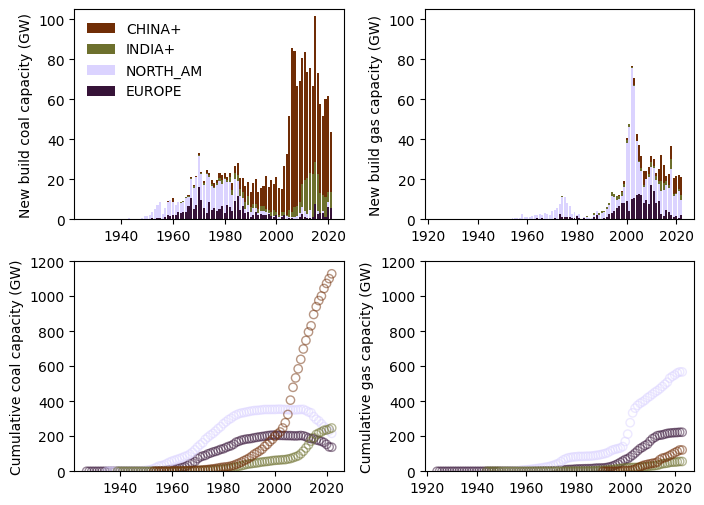

In [32]:
cmap = plt.get_cmap("cmc.glasgowS")
count = 0
f, axes = plt.subplots(2,2,figsize=(8,6))
f.subplots_adjust(wspace=0.3,hspace=0.2)
for col in ['EUROPE','NORTH_AM','INDIA+','CHINA+']:
    this_gas = gas_nb_R10.query("AR6_R10_simple==@col")
    axes[1,1].scatter(x=this_gas["year"],y=this_gas["Gas_Current_MW"]/1000,
                        edgecolor=cmap.colors[count],facecolor="None",marker="o",linewidth=1,alpha = 0.5)
    this_coal = coal_nb_R10.query("AR6_R10_simple==@col")
    axes[1,0].scatter(x=this_coal["year"],y=this_coal["Coal_Current_MW"]/1000,
                        edgecolor=cmap.colors[count],facecolor="None",marker="o",linewidth=1,alpha = 0.5)
    if col == 'EUROPE':
        axes[0,0].bar(x=coal_pivot.index, height=coal_pivot[col],color=cmap.colors[count],label=col)
        axes[0,1].bar(x=gas_pivot.index, height=gas_pivot[col],color=cmap.colors[count],label=col)
        coal_y = coal_pivot[col]
        gas_y = gas_pivot[col]
        
    else:
        axes[0,1].bar(x=gas_pivot.index, height=gas_pivot[col],bottom = gas_y, color=cmap.colors[count],label=col)
        axes[0,0].bar(x=coal_pivot.index, height=coal_pivot[col],bottom=coal_y,color=cmap.colors[count],label=col)
        coal_y = coal_y+coal_pivot[col]
        gas_y = gas_y+gas_pivot[col]
    count = count + 1
handles, labels = axes[0,0].get_legend_handles_labels()
axes[0,0].legend(handles[::-1], labels[::-1],frameon=False)
axes[0,0].set_ylabel("New build coal capacity (GW)")
axes[0,1].set_ylabel("New build gas capacity (GW)")
axes[1,0].set_ylabel("Cumulative coal capacity (GW)")
axes[1,1].set_ylabel("Cumulative gas capacity (GW)")
axes[0,0].set_ylim([0,105])
axes[0,1].set_ylim([0,105])
axes[1,0].set_ylim([0,1200])
axes[1,1].set_ylim([0,1200])
f.savefig("historical_newbuild_cumulative.png",dpi=600, bbox_inches='tight')